In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cd_data = pd.read_csv("kyphosis.csv")

In [ ]:
cd_data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


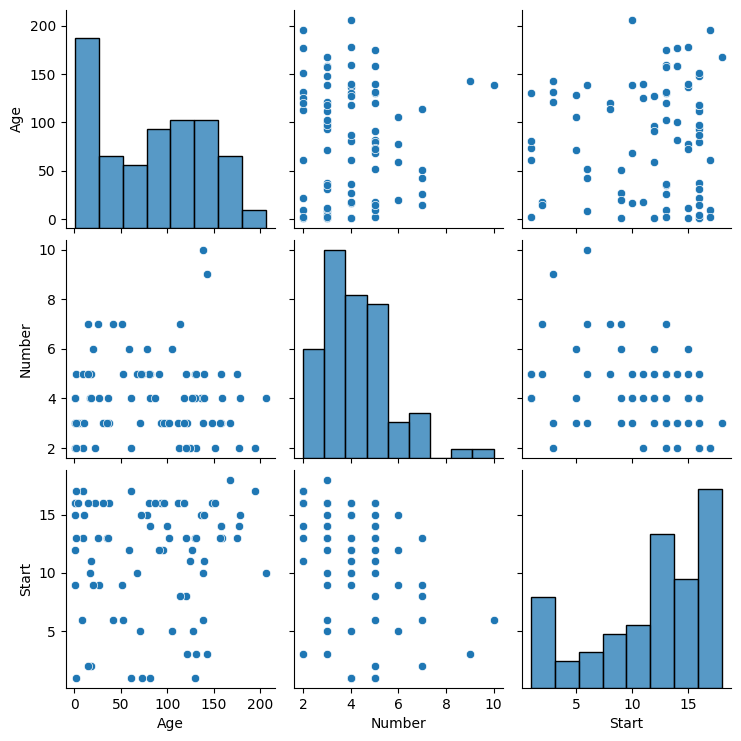

In [ ]:
sns.pairplot(cd_data)

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = cd_data.drop('Kyphosis', axis=1)
y = cd_data['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(criterion ="entropy")

In [ ]:
dtree1 = DecisionTreeClassifier(criterion="entropy", max_depth=20)

In [ ]:
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

##Predictions

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
predictions1 = dtree1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[16,  1],
       [ 6,  2]])

In [ ]:
confusion_matrix(y_test, predictions1)

array([[16,  1],
       [ 6,  2]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



In [ ]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(cd_data.columns[1:])
features

['Age', 'Number', 'Start']

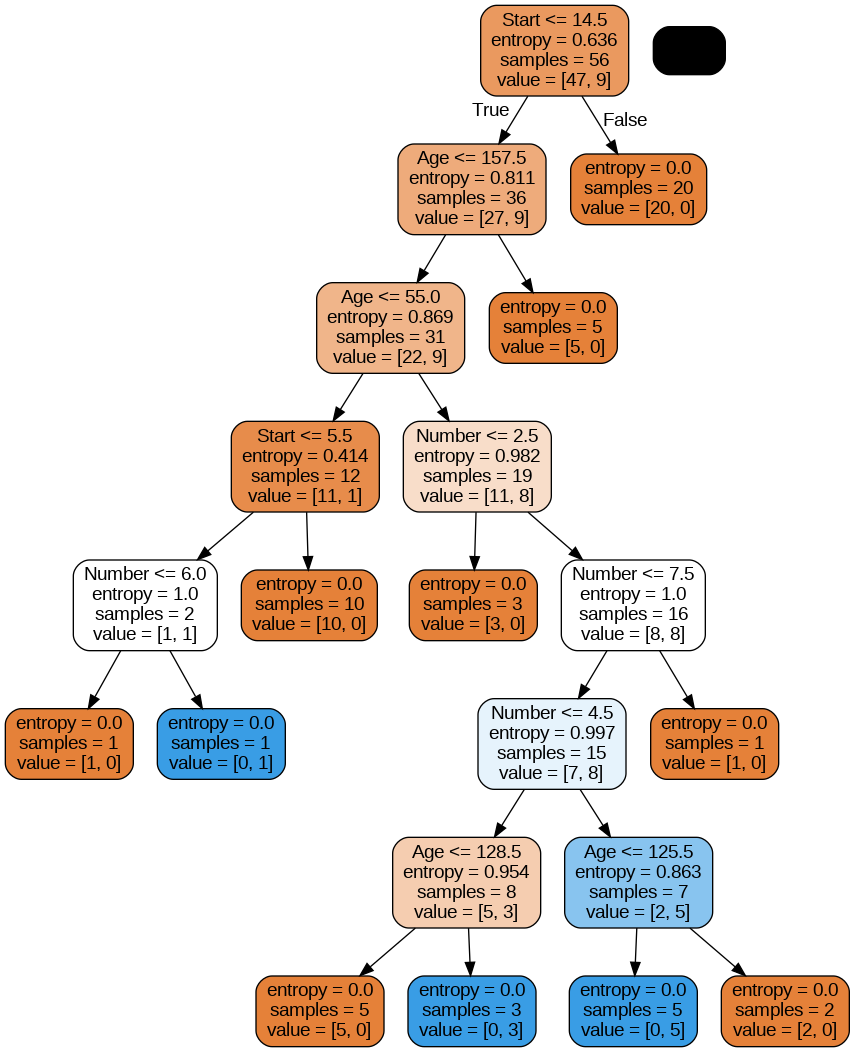

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

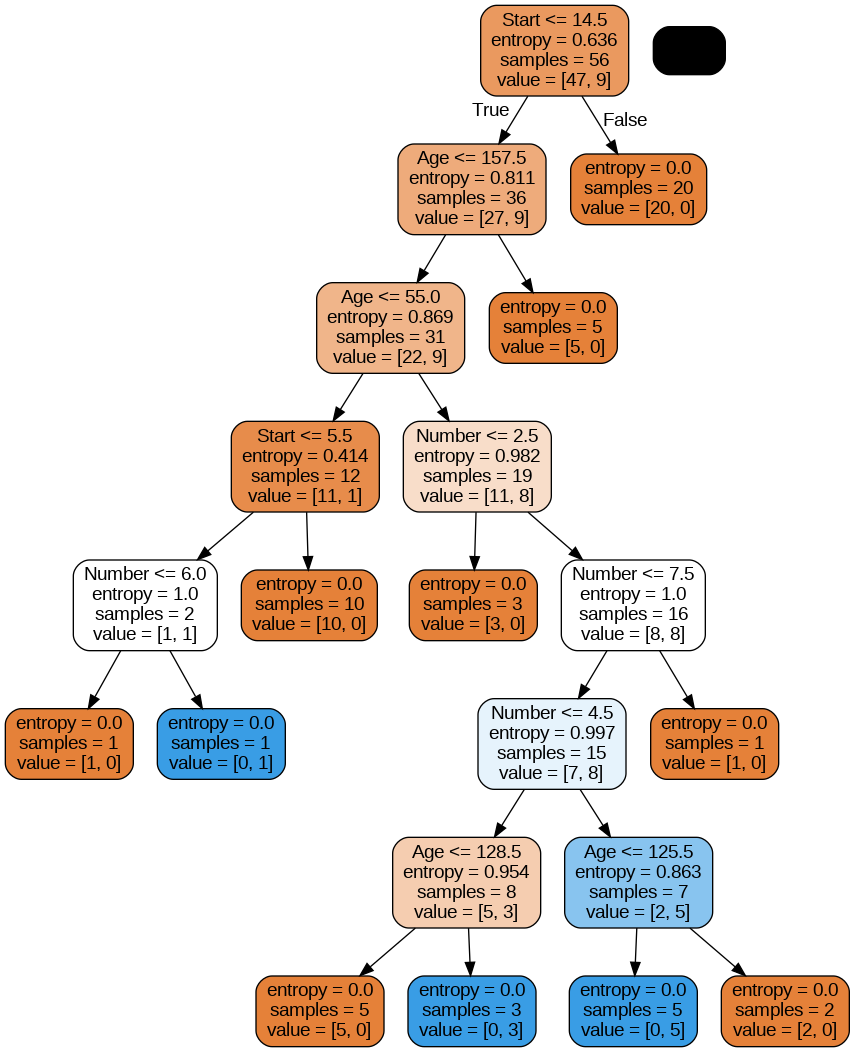

In [ ]:
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=150, criterion="entropy")
rfc.fit(X_train, y_train)

## n_estimators should always be mininum 90

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [ ]:
rfc_predict = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, rfc_predict)

array([[17,  0],
       [ 6,  2]])

In [ ]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

